<a href="https://colab.research.google.com/github/kwfung/DataScience_Projects/blob/main/mqlcasestudy_growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **MQLcasestudy-Growth**

Context:
Please use the attached ​MQL dummy dataset that contains data about marketing leads.

1.   Column A depicts the client status of a lead (MQL = Marketing Qualified Lead; SQL = A Converted MQL by sales also known as Sales Qualified Lead). Assume the MQL -> SQL conversion happens the same day and that every SQL had to be a MQL at some point. Every row is a unique user ID.
2.   Column B contains the date in which the MQL was created.
3.  Column C contains the source that drove the creation of the MQL (email, paid social, direct mail, other).

Please conduct an analysis to answer the following questions, you can download the dataset into an excel spreadsheet if it’s easier for you. Please create charts/graphs where applicable to most confidently answer each question




---



In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import pandas as pd

file_path = '/content/drive/My Drive/Verkada-MQLcasestudy-Growth.xlsx'

# Read the data into a DataFrame
df = pd.read_excel(file_path)

df.head()

,Client Status,Source,MQL Created Date
0,SQL,Email,2019-04-01
1,SQL,Email,2019-04-01
2,SQL,Email,2019-04-01
3,SQL,Email,2019-04-01
4,SQL,Email,2019-04-01


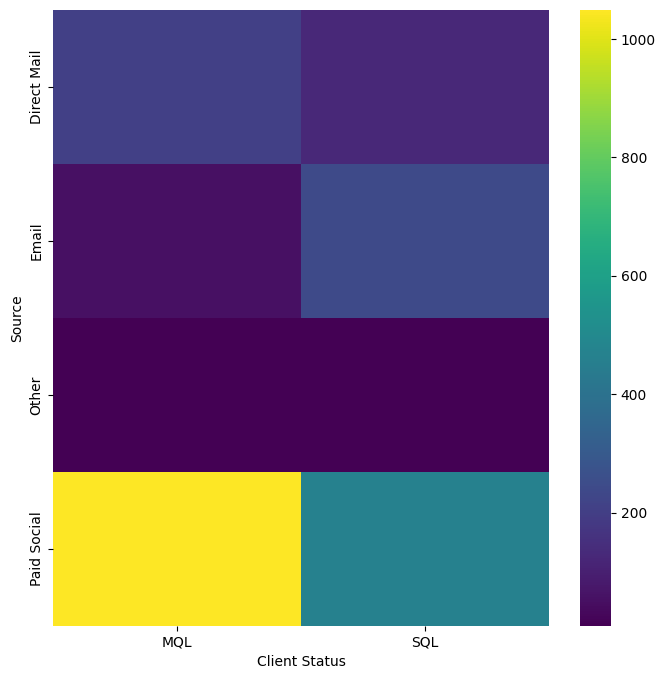

In [ ]:
# @title Client Status vs Source

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Source'].value_counts()
    for x_label, grp in df.groupby('Client Status')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Client Status')
_ = plt.ylabel('Source')

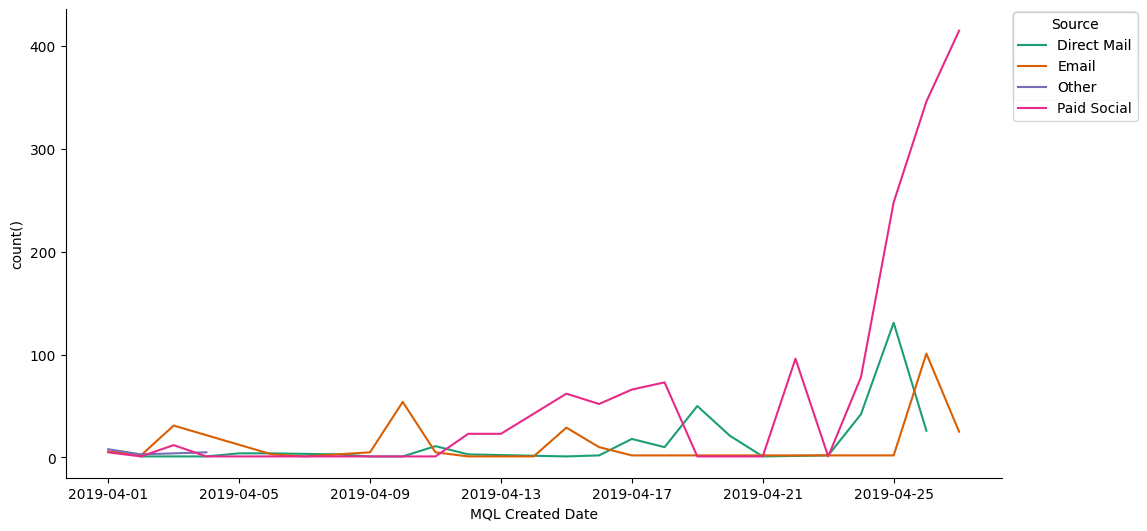

In [ ]:
# @title MQL Created Date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['MQL Created Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'MQL Created Date'}, axis=1)
              .sort_values('MQL Created Date', ascending=True))
  xs = counted['MQL Created Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('MQL Created Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Source')):
  _plot_series(series, series_name, i)
  fig.legend(title='Source', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MQL Created Date')
_ = plt.ylabel('count()')

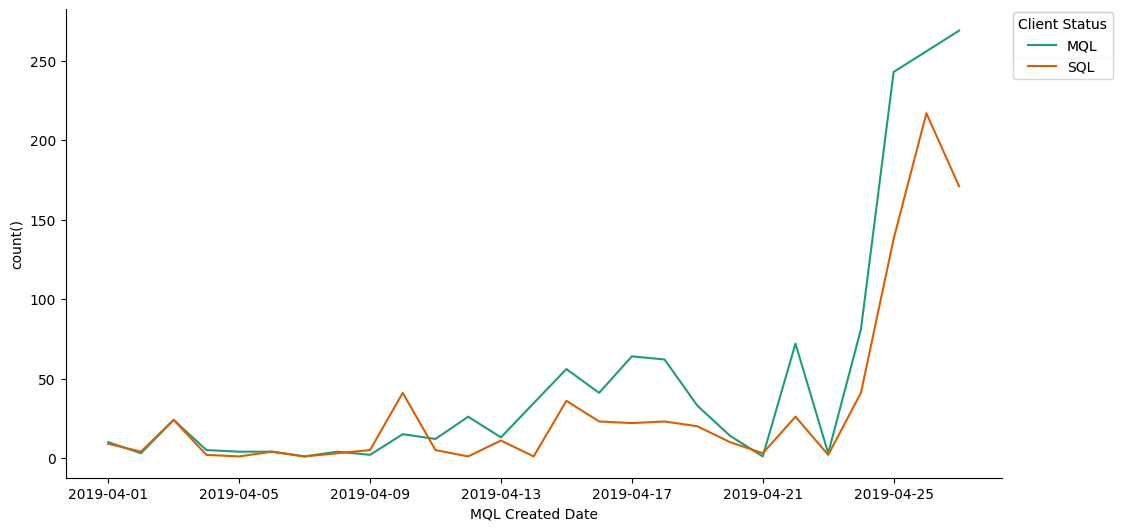

In [ ]:
# @title MQL Created Date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['MQL Created Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'MQL Created Date'}, axis=1)
              .sort_values('MQL Created Date', ascending=True))
  xs = counted['MQL Created Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('MQL Created Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Client Status')):
  _plot_series(series, series_name, i)
  fig.legend(title='Client Status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MQL Created Date')
_ = plt.ylabel('count()')

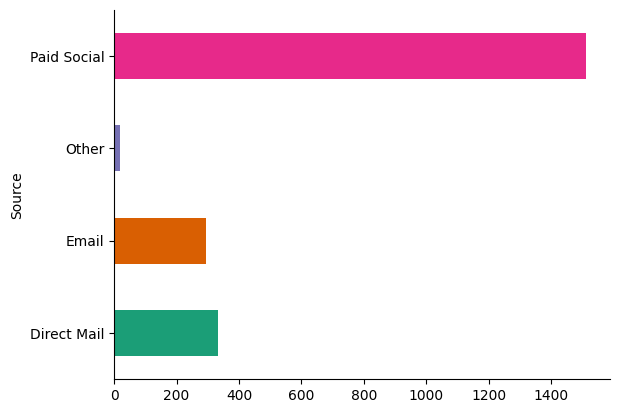

In [ ]:
# @title Source

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Source').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

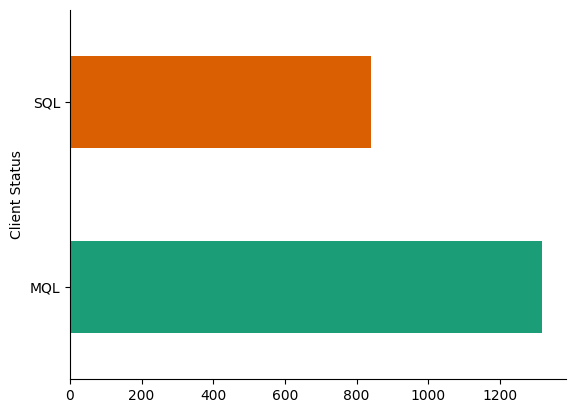

In [ ]:
# @title Client Status

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Client Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# What is the overall MQL to SQL conversion rate by week (assume weeks start on mondays and end on sundays)

In [ ]:
# Add a week number column to the df based on the MQL Created Date

import datetime

def get_week_number(date):
    return date.isocalendar()[1]

df['Week_Number'] = df['MQL Created Date'].apply(get_week_number)
df.head()

,Client Status,Source,MQL Created Date,Week_Number
0,SQL,Email,2019-04-01,14
1,SQL,Email,2019-04-01,14
2,SQL,Email,2019-04-01,14
3,SQL,Email,2019-04-01,14
4,SQL,Email,2019-04-01,14


In [ ]:
# Group the dataset by Client Status and Week Number, and get the count of users
df_by_week = df.groupby(['Client Status', 'Week_Number']).size().reset_index(name='count')
df_by_week.head(10)

,Client Status,Week_Number,count
0,MQL,14,51
1,MQL,15,72
2,MQL,16,271
3,MQL,17,924
4,SQL,14,45
5,SQL,15,64
6,SQL,16,137
7,SQL,17,595


In [ ]:
def calculate_conversion(df):
  count_sql = df[df['Client Status'] =='SQL']['count'].sum()
  total_count = df['count'].sum()
  return count_sql/total_count

conversion= df_by_week.groupby('Week_Number').apply(calculate_conversion)
conversion = conversion.reset_index(name='cvr')
conversion.head()

,Week_Number,cvr
0,14,0.468750
1,15,0.470588
2,16,0.335784
3,17,0.391705


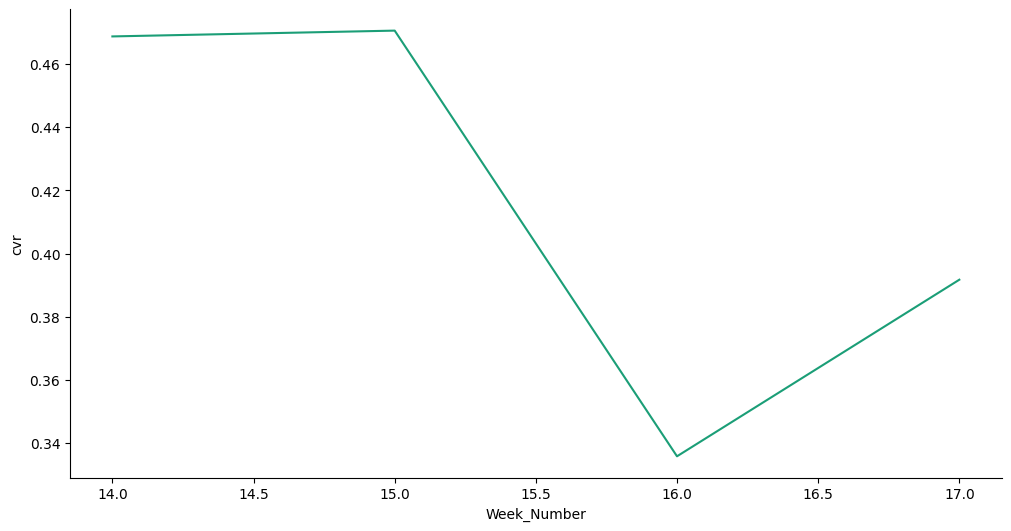

In [ ]:
# @title Week_Number vs cvr

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Week_Number']
  ys = series['cvr']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = conversion.sort_values('Week_Number', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Week_Number')
_ = plt.ylabel('cvr')

# How has the overall MQL conversion rate changed over time?

In [ ]:
# Formula to calculate conversion - doing count of client status = SQL/ total count by group

def calculate_conversion_2(df):
  return df[df['Client Status'] == 'SQL'].shape[0]/df.shape[0]

df_cvr = df.groupby(['MQL Created Date', 'Source']).apply(calculate_conversion_2)
df_cvr = df_cvr.reset_index(name="cvr")

df_cvr.head()

,MQL Created Date,Source,cvr
0,2019-04-01,Email,1.00
1,2019-04-01,Other,0.25
2,2019-04-01,Paid Social,0.20
3,2019-04-02,Direct Mail,0.00
4,2019-04-02,Email,1.00


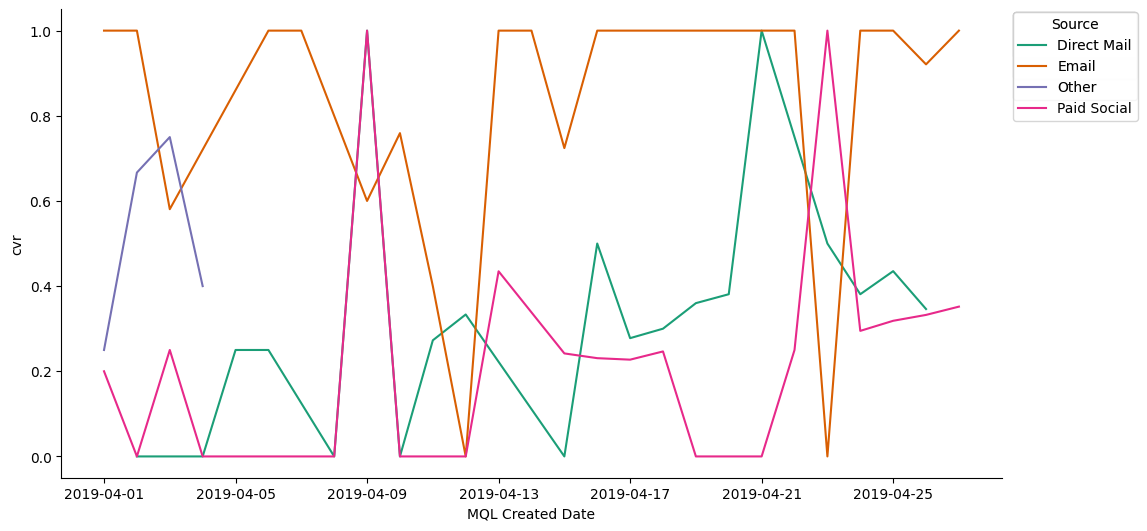

In [ ]:
# @title MQL Created Date vs cvr by marketing source

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MQL Created Date']
  ys = series['cvr']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_cvr.sort_values('MQL Created Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Source')):
  _plot_series(series, series_name, i)
  fig.legend(title='Source', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MQL Created Date')
_ = plt.ylabel('cvr')

In [ ]:
# caluclate the conversion by day
df_cvr_day = df.groupby(['MQL Created Date']).apply(calculate_conversion_2)
df_cvr_day = df_cvr_day.reset_index(name="cvr")

df_cvr_day.head()

,MQL Created Date,cvr
0,2019-04-01,0.473684
1,2019-04-02,0.571429
2,2019-04-03,0.500000
3,2019-04-04,0.285714
4,2019-04-05,0.200000


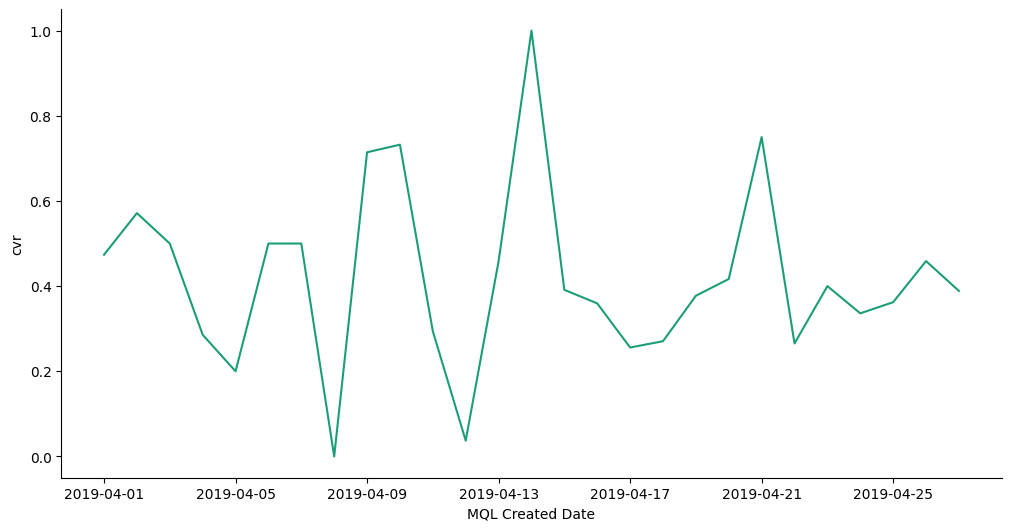

In [ ]:
# @title MQL Created Date vs cvr

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MQL Created Date']
  ys = series['cvr']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_cvr_day.sort_values('MQL Created Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MQL Created Date')
_ = plt.ylabel('cvr')

In [ ]:
# calculating conversion rate by week number and source

df_cvr_week = df.groupby(['Week_Number','Source']).apply(calculate_conversion_2)
df_cvr_week = df_cvr_week.reset_index(name="cvr")

df_cvr_week.head()

,Week_Number,Source,cvr
0,14,Direct Mail,0.181818
1,14,Email,0.697674
2,14,Other,0.450000
3,14,Paid Social,0.181818
4,15,Direct Mail,0.263158


In [ ]:
# Group the dataset by Client Status, Week Number, Source, and the count of users
df_by_week_source = df.groupby(['Client Status', 'Week_Number', 'Source']).size().reset_index(name='count')
df_by_week_source.head()
print(df_by_week_source.columns)

Index(['Client Status', 'Week_Number', 'Source', 'count'], dtype='object')


In [ ]:
# transpose the table
df_by_week_source = df_by_week_source.set_index(['Week_Number', 'Source', 'Client Status'])['count'].unstack()

In [ ]:
df_by_week_source= df_by_week_source.reset_index()

In [ ]:
df_by_week_source.head()

Client Status,Week_Number,Source,MQL,SQL
0,14,Direct Mail,9,2
1,14,Email,13,30
2,14,Other,11,9
3,14,Paid Social,18,4
4,15,Direct Mail,14,5


In [ ]:
# Join 1)the table with CVR by week/source and 2) The table with count of users by week/source/status

df_cvr_week_merge = pd.merge(df_cvr_week, df_by_week_source, how = "left", left_on= ['Week_Number', 'Source'], right_on= ["Week_Number", "Source"])
df_cvr_week_merge.head(10)

,Week_Number,Source,cvr,MQL,SQL
0,14,Direct Mail,0.181818,9,2
1,14,Email,0.697674,13,30
2,14,Other,0.450000,11,9
3,14,Paid Social,0.181818,18,4
4,15,Direct Mail,0.263158,14,5
5,15,Email,0.716418,19,48
6,15,Paid Social,0.220000,39,11
7,16,Direct Mail,0.349515,67,36
8,16,Email,0.836735,8,41
9,16,Paid Social,0.234375,196,60


<ipython-input-36-d6c521b05685>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


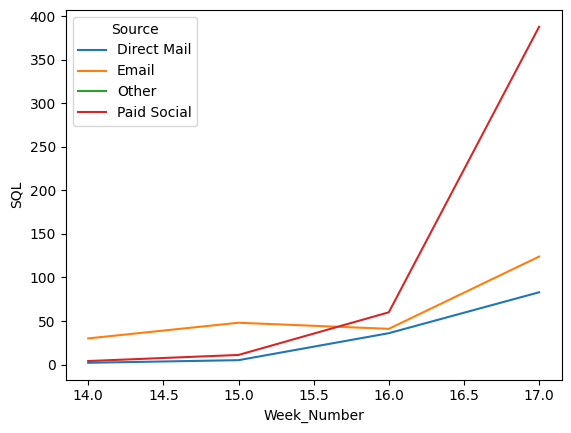

In [ ]:
# visualizing the above

import seaborn as sns
import pandas as pd
import numpy as np


sns.lineplot(
    x = "Week_Number",
    y = "SQL",
    hue = "Source",
    data=df_cvr_week_merge,
    estimator=np.sum,  # For stacking values 2 and 3
    ci=None           # Remove error bars if needed
)


plt.show()

<ipython-input-40-83f3d72480fb>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


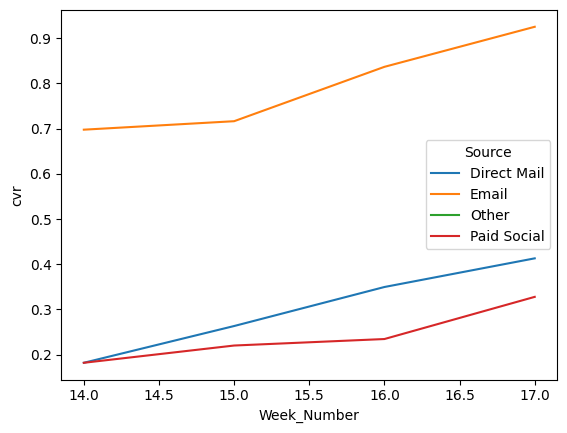

In [ ]:
# visualizing the above

import seaborn as sns
import pandas as pd
import numpy as np


sns.lineplot(
    x = "Week_Number",
    y = "cvr",
    hue = "Source",
    data=df_cvr_week_merge,
    estimator=np.sum,  # For stacking values 2 and 3
    ci=None           # Remove error bars if needed
)


plt.show()

<ipython-input-37-46cc04eb59b1>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


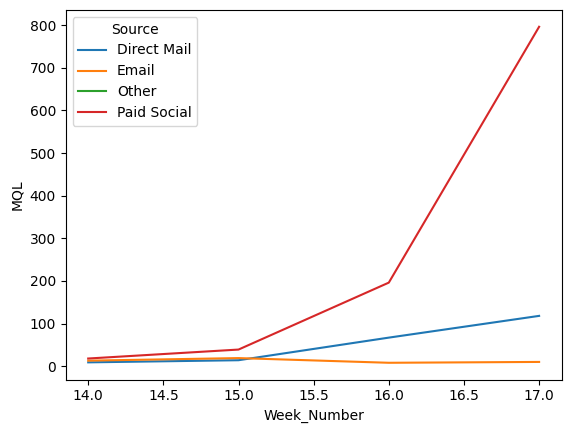

In [ ]:
# visualizing the above

import seaborn as sns
import pandas as pd
import numpy as np


sns.lineplot(
    x = "Week_Number",
    y = "MQL",
    hue = "Source",
    data=df_cvr_week_merge,
    estimator=np.sum,  # For stacking values 2 and 3
    ci=None           # Remove error bars if needed
)


plt.show()